# Лабораторная работа №7
# ЧИСЛЕННОЕ РЕШЕНИЕ ЗАДАЧИ КОШИ  ДЛЯ СИСТЕМ  ОБЫКНОВЕННЫХ ДИФФЕРЕНЦИАЛЬНЫХ УРАВНЕНИЙ
## Липатова София
## А-14-21  
# Вариант №27

**Задача 7.1.** Найти приближенное решение задачи Коши.

$\left\{\begin{array}{ll}\text{$y'=-25y+25\sin⁡(\pi t)-15$$$} \\\text{y(0)=3} \\ \end{array}\right.$

на отрезке [0,3] с точностью $\epsilon = 10^{-4}$.

1.Найти аналитическое решение задачи. $(x = t)$  

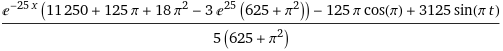

2. Составить программу, реализующую  вычисление приближенного решения по   явному  и неявному методам   Эйлера с заданной точностью. Оценку погрешности производить по правилу Рунге.   Найти решение  с точностью $ε=10^{-4}$ каждым методом.  Определить  с каким шагом по времени достигнута заданная точность в каждом случае. 

In [93]:
import numpy as np
import matplotlib.pyplot as plt


In [94]:
def f(t,y): #скаляры!!! 
    return -25*y+ 25*np.sin(np.pi*t) - 15

In [95]:
def Euler_exp(h): #принимает вектора
    t = np.linspace(0,3,int(3/h))
    y = np.zeros(t.size)
    y[0] = 3
    for i in range(0,len(t)-1):
        y[i+1]= y[i] + h*f(t[i],y[i])
    return y

def Euler_imp(h):
    t = np.linspace(0,3,int(3/h))
    y = np.zeros(t.size)
    y[0] = 3
    for i in range (0,len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
        y[i+1] = y[i] + h*f(t[i+1],y[i+1])
    return y

In [96]:
def y_acc(x): #точное решение
    return (np.exp(-25*x)*(11250 + 125*np.pi + 18*np.pi**2-3*np.exp(25*x)*(625 + np.pi**2))-125*np.pi*np.cos(np.pi*x) + 3125*np.sin(np.pi*x))/(5*(625 + np.pi**2))
    
arr = np.array([y_acc(x) for x in np.linspace(0,3,100)])
#print(arr)

h = 1
eps = 100

while (eps>10**(-4)):
    m = Euler_exp(h/2)
    n = Euler_exp(h)
    z = np.array([m[i] for i in range (0,m.size,2)])
    l = np.abs(z - n)
    eps = l.max()
    h = h/2
    
print("Достигнутая точность: ", eps)
print("\nШаг по времени: ", h)    
eu_ex_h = h

Достигнутая точность:  6.529467468352479e-05

Шаг по времени:  3.814697265625e-06


In [97]:
eps = 100
h = 1
while (eps>10**(-4)):
    m = Euler_imp(h/2)
    n = Euler_imp(h)
    z = np.array([m[i] for i in range (0,m.size,2)])
    l = np.abs((z - n)/3)
    eps = l.max()
    h = h/2
    #print(eps)
    
print("Достигнутая точность: ", eps)
print("\nШаг по времени: ", h)  

eu_im_h = h

Достигнутая точность:  8.736315858866768e-05

Шаг по времени:  1.52587890625e-05


3. Используя встроенную  функцию Python  scipy.integrate.solve_ivp,  найти решение задачи с точностью $ε=10^{-4}$,  используя методы  RK45 и  BDF. Прочтите описание методов  и  разберитесь, к какому  типу относятся эти методы. Проанализируйте, как методы распределяли  узлы  в расчетной  области.

In [98]:
import scipy as sc

In [99]:
from scipy.integrate import solve_ivp


t0 = 0
y0 = 3

t = (0, 3)

# RK45 - дефолтный, явный, порядка 5(4), погрешность вычисляется по формуле 4-го порядка точности 
#но шаги берутся с использованием формулы 5-го порядка (локальная экстраполяция) 
rk45 = solve_ivp(f, t, [y0], method='RK45', rtol=1e-4)

# BDF - неявный, многошаговый метод с переменным порядком, основанный на формуле обратного дифференцирования
#для аппроксимации производной. Используется схема с квазипостоянным шагом, точность повышается с помощью модификации NDF
bdf = solve_ivp(f, t, [y0], method='BDF', rtol=1e-4)

# Вывод результатов
print("RK45: ")
print("\nШаг по времени: ", rk45.t[1] - rk45.t[0])
print("\nУзлы: ", rk45.t)
print("\nВектор решения: ", rk45.y[0])

print("\nBDF: ")
print("\nУзлы: ", bdf.t)
arr = np.array([ np.abs(bdf.t[i+1] - bdf.t[i]) for i in range((bdf.t.size) - 1) ])
print("\nШаг по времени: ", arr.min())
print("\nВектор решения: ", bdf.y[0])

RK45: 

Шаг по времени:  0.016683861117476464

Узлы:  [0.         0.01668386 0.03866915 0.05999954 0.08040264 0.09903824
 0.11604399 0.13636884 0.15890452 0.18384182 0.21146855 0.24175248
 0.2749359  0.31690133 0.35886677 0.40049838 0.442502   0.48485934
 0.5273995  0.56993446 0.61235083 0.65473779 0.69685648 0.73844866
 0.77915157 0.8183807  0.85113117 0.88307448 0.92268466 0.96803032
 1.01966756 1.07997235 1.14908214 1.21008835 1.27109457 1.32962305
 1.38653829 1.44248991 1.49779499 1.55265671 1.60722164 1.66175495
 1.71640426 1.77128878 1.82656484 1.88245279 1.9393032  1.99776124
 2.0593142  2.12963379 2.17887454 2.22146074 2.25556486 2.28966898
 2.32627994 2.3657418  2.40670647 2.44854591 2.49086686 2.53339343
 2.57590434 2.61832699 2.66068865 2.70275021 2.74424236 2.78478066
 2.82373116 2.8597965  2.89389524 2.93522549 2.9822847  3.        ]

Вектор решения:  [ 3.          1.7818082   0.81275217  0.29385932  0.02517052 -0.10327194
 -0.15990487 -0.18041831 -0.16721799 -0.12857075 -

4. Построить графики  аналитического решения и найденных приближенных решений задачи. 

<Figure size 640x480 with 0 Axes>

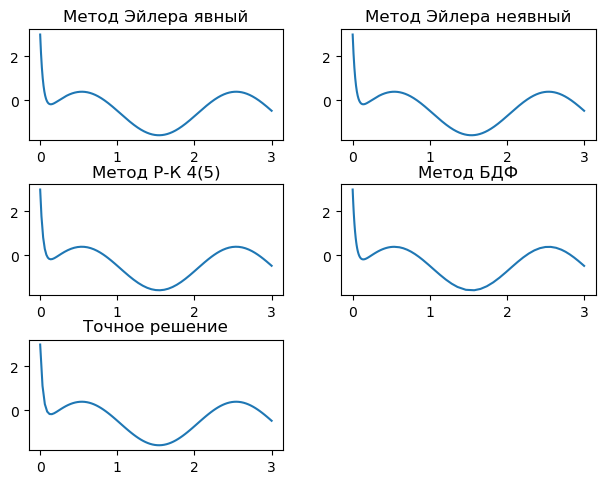

In [100]:
plt.figure()

fig, ax = plt.subplots(3,2)

fig.tight_layout()

t = np.linspace(0,3,int(3/eu_ex_h))

ax[0][0].set_title("Метод Эйлера явный")

ax[0][0].plot(t, Euler_exp(eu_ex_h))

t = np.linspace(0,3,int(3/eu_im_h))

ax[0][1].set_title("Метод Эйлера неявный")

ax[0][1].plot(t, Euler_imp(eu_im_h))

ax[1][0].set_title("Метод Р-К 4(5)")
ax[1][0].plot(rk45.t, rk45.y[0])

ax[1][1].set_title("Метод БДФ")
ax[1][1].plot(bdf.t,bdf.y[0])

arr = np.array([y_acc(x) for x in np.linspace(0,3,100)])

ax[2][0].set_title("Точное решение")

ax[2][0].plot(np.linspace(0,3,100), arr)

ax[2][1].axis("off")

plt.show()


Результаты выглядят одинаковыми, если есть различия, то они несущественны в рамках нашей задачи.

**Задача 7.2.**  Найти решения задач  Коши  для  ОДУ  1 порядка (7.2) и (7.3)  на отрезке $[0,50]$  с заданной точностью $\epsilon = 0.0001$ методом Эйлера-Коши. Построить графики решений и найти наибольшую площадь, заключенную между интегральными кривыми.

$y'=0,01(20-y)(y+19),\\  y(0)=40.$
 
$z^{'}=0,01(20-z)(z+19)+sin⁡(\frac{t}{5}),\\ z(0)=40.$

1. Составить программу, реализующую метод Эйлера-Коши. Решения задач находить с точностью  $\epsilon=10^{-4}.$

In [195]:
def f(t,y): #t - скаляр, y - вектор (y,z)
    return np.array([0.01*(20-y[0])*(y[0]+1), 0.01*(20-y[1])*(y[1]+19) + np.sin(t/5)])

In [206]:
def Euler_Cauchy(h):
    t = np.linspace(0,50,int(50/h))
    y = np.zeros((t.size,2))
    y[0] = [40,40]
    for i in range (0,len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
        y[i+1] = y[i] + (h/2)*(f(t[i],y[i]) + f(t[i+1],y[i+1]))                       
    return y

In [207]:
eps = 100
h = 1
while (eps>10**(-4)):
    m = Euler_Cauchy(h/2)
    n = Euler_Cauchy(h)
    z = np.array([m[i] for i in range (0,m.size//2,2)])
    l = np.abs((z - n)/3)
    eps = l.max()
    h = h/2
    
print("Достигнутая точность: ", eps)
print("\nШаг по времени: ", h)  

y = Euler_Cauchy(h)
z = y[:,1]
y = y[:,0]
t = np.linspace(0,50,int(50/h))
n = int(50/h)-1
n=int(n/2)

Достигнутая точность:  6.936376527851469e-05

Шаг по времени:  0.00048828125


2. Построить графики полученных решений $y(t)$ и $z(t)$.

<Figure size 640x480 with 0 Axes>

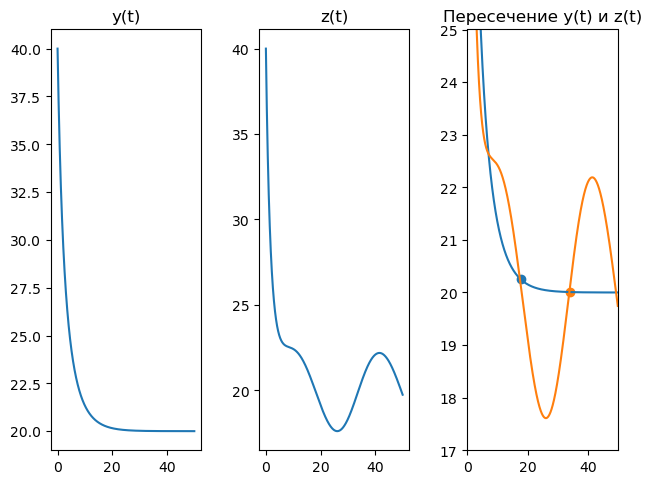

In [208]:
plt.figure()

fig,ax = plt.subplots(1,3)

fig.tight_layout()

ax[0].set_title("y(t)")
ax[0].plot(t,y)
ax[1].set_title("z(t)")
ax[1].plot(t,z)
ax[2].set_title("Пересечение y(t) и z(t)")
plt.xlim(0,50)
plt.ylim(17,25)
ax[2].plot(t,y)
ax[2].plot(t,z)
ax[2].scatter(17.9,20.25)
ax[2].scatter(34,20.01)
plt.show()


3. Вычислить приближенно площади между полученными кривыми на отрезке по квадратурной формуле Симпсона. 

In [218]:
def simps(h,n,y):
    sum1 = 0
    sum2 = 0
    for i in range(1,2*n,2):
        sum1+= y[i]
    for i in range(2,2*n,2):
        sum2 += y[i]
        
    return h*(y[0]) + 4*sum1 + 2*sum2 + y[2*n]/6 

y = Euler_Cauchy(h)
z = y[:,1]
y = y[:,0]

i=0

while (z[i]>20.25):
    i+=1
    
start = i

while (z[i]>20.01):
    i+=1
    
i+=10

while (z[i]<=20.01):
    i+=1
    
end = i #промежуток примерно 18-34 18-20.25 в обычных единицах 

y = Euler_Cauchy(h)

z = y[start:end,1]

y = y[start:end,0]

n = int((end - start)/h)
n = int((end - start)/2)-1

print("Площадь между кривыми: ", (np.abs(simps(h,n,y) - simps(h,n,z)))/n*2)

Площадь между кривыми:  18.31672437228753
